# **Proyecto EDA - Exploratory Data Analysis**

## Año 2021

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
direccion1="./Datasets/2020_Accidentalidad.csv"
direccion2="./Datasets/2021_Accidentalidad.csv"
direccion3="./Datasets/2022_Accidentalidad.csv"
direccion4="./Datasets/2023_Accidentalidad.csv"
direccion5="./Datasets/2024_Accidentalidad.csv"
direccion6="./Datasets/2025_Accidentalidad.csv"

In [3]:
df_accidentes_2021=pd.read_csv(direccion2, sep=";", encoding="utf-8")
df_21=df_accidentes_2021.copy()

In [4]:
df_21_2=df_accidentes_2021.copy()

In [6]:
#En primer lugar, fechamos un vistazo a las 5 primeras filas
df_21.head(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN
1,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,444976.0,4470508.0,N,NaN
2,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,444976.0,4470508.0,N,NaN
3,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 10 a 14 años,Hombre,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN
4,2020S019534,01/01/2021,4:30:00,AVDA. PABLO NERUDA / CALL. LEONESES,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 35 a 39 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN


In [7]:
#Visualizamos información general del dataframe:
print(f"La base de datos tiene {len(df_21.columns)} campos y {len(df_21)} registros.")
df_21.info()

La base de datos tiene 19 campos y 41783 registros.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41783 entries, 0 to 41782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        41783 non-null  object 
 1   fecha                 41783 non-null  object 
 2   hora                  41783 non-null  object 
 3   localizacion          41783 non-null  object 
 4   numero                41780 non-null  object 
 5   cod_distrito          41780 non-null  float64
 6   distrito              41780 non-null  object 
 7   tipo_accidente        41779 non-null  object 
 8   estado_meteorológico  37355 non-null  object 
 9   tipo_vehiculo         41729 non-null  object 
 10  tipo_persona          41780 non-null  object 
 11  rango_edad            41783 non-null  object 
 12  sexo                  41783 non-null  object 
 13  cod_lesividad         22819 non-null  float64
 14  lesividad         

In [8]:
#Visualizamos información de las variables numéricas
#Variables numéricas: cod_lesividad, coordenada_x_utm, coordenada_y_utm, positiva_alcohol
df_21.describe()

,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga
count,41780.000000,22819.000000,41771.000000,4.177100e+04,89.0
mean,9.887697,9.996626,442087.280721,4.474754e+06,1.0
std,5.609092,4.741567,3435.287175,3.933428e+03,0.0
min,1.000000,1.000000,429078.000000,4.463455e+06,1.0
25%,5.000000,7.000000,439904.000000,4.471734e+06,1.0
50%,10.000000,14.000000,441777.000000,4.474815e+06,1.0
75%,14.000000,14.000000,443996.000000,4.477463e+06,1.0
max,21.000000,14.000000,454178.000000,4.495115e+06,1.0


In [9]:
#Obtenemos número de nulos y cardinalidad de todas las variables
#Creamos el df de tipificación
def nulos_cardinalidad(df,umbral_categoria, umbral_continua):
    nulls=df.isna().sum().sort_values(ascending=False)
    nulls_rel=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
    card=df.nunique()
    card_rel=df.nunique()/len(df)*100
    tipo=df.dtypes
    df_tipificacion= pd.DataFrame([nulls, nulls_rel, card, card_rel, tipo]).T.rename(columns = {0: "Nulls", 1: "Nulls_rel", 2: "Card", 3: "Card_rel", 4: "Tipo"}) #hace falta poner corchetes
    df_tipificacion["Clasificada_como"]="sin categoría" #partimos asumiendo que todas son categorica
    df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
    df_tipificacion.loc[df_tipificacion.Tipo == "datetime64[ns]", "Clasificada_como"] = "Fecha"
    df_tipificacion.loc[(df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Categórica"
    df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Numérica ordinal"
    df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > umbral_categoria) & (df_tipificacion.Card_rel < umbral_continua), "Clasificada_como"] = "Numérica discreta"
    df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card_rel > umbral_continua), "Clasificada_como"] = "Numérica continua"
    return df_tipificacion

In [10]:
print(f"EL dataframe tiene {len(df_21)} registros.")
df_tipificacion=nulos_cardinalidad(df_21,38,30)
df_tipificacion

EL dataframe tiene 41783 registros.


,Nulls,Nulls_rel,Card,Card_rel,Tipo,Clasificada_como
positiva_droga,41694,99.786995,1,0.002393,float64,sin categoría
lesividad,18964,45.38688,8,0.019147,object,Categórica
cod_lesividad,18964,45.38688,8,0.019147,float64,Numérica ordinal
estado_meteorológico,4428,10.597611,7,0.016753,object,Categórica
positiva_alcohol,167,0.399684,2,0.004787,object,Binaria
tipo_vehiculo,54,0.129239,37,0.088553,object,Categórica
coordenada_x_utm,12,0.02872,9430,22.568987,float64,Numérica discreta
coordenada_y_utm,12,0.02872,10206,24.426202,float64,Numérica discreta
tipo_accidente,4,0.009573,13,0.031113,object,Categórica
distrito,3,0.00718,21,0.05026,object,Categórica


In [11]:
#Visualizamos los valores de las variables categóricas:
variables_categoricas=df_tipificacion.loc[(df_tipificacion.Clasificada_como == "Categórica") | (df_tipificacion.Clasificada_como == "Binaria"), :].index.to_list()
variables_categoricas

['lesividad',
 'estado_meteorológico',
 'positiva_alcohol',
 'tipo_vehiculo',
 'tipo_accidente',
 'distrito',
 'tipo_persona',
 'rango_edad',
 'sexo']

In [12]:
for categoria in variables_categoricas:
    frec_abs=df_21[categoria].value_counts(dropna=False)
    frec_rel=df_21[categoria].value_counts(dropna=False, normalize=True)*100
    df_frec=pd.concat([frec_abs, frec_rel], axis=1)
    df_frec.columns=["Frec. Absoluta", "Frec. Relativa (%)"]

    print(f"Resumen de {categoria}:")
    print(df_frec)
    print(f"Su cardinalidad es: {df_tipificacion.loc[categoria, "Card"]}")
    print("\n"*2)

Resumen de lesividad:
                                                    Frec. Absoluta  \
lesividad                                                            
NaN                                                          18964   
Sin asistencia sanitaria                                     12632   
Asistencia sanitaria sólo en el lugar del accid...            5256   
Ingreso inferior o igual a 24 horas                           1562   
Atención en urgencias sin posterior ingreso                   1327   
Asistencia sanitaria inmediata en centro de sal...             952   
Ingreso superior a 24 horas                                    556   
Asistencia sanitaria ambulatoria con posterioridad             506   
Fallecido 24 horas                                              28   

                                                    Frec. Relativa (%)  
lesividad                                                               
NaN                                                          

In [13]:
#Convertimos los campos de fecha y hora a datetime y creamos una nueva columna:

df_21["fecha"] = pd.to_datetime(df_21["fecha"], errors="coerce", dayfirst=True) 
df_21["hora"] = pd.to_datetime(df_21["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_21["fecha_hora"] = df_21.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

In [14]:
#Eliminamos dobles espacios y unificamos el formato de los campos: "num_expediente", "localizacion", "numero"
cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_21[col] = df_21[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)
    

In [15]:
df_21.head(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,fecha_hora
0,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN,2021-01-01 04:30:00
1,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,444976.0,4470508.0,N,NaN,2021-01-01 04:30:00
2,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,444976.0,4470508.0,N,NaN,2021-01-01 04:30:00
3,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 10 a 14 años,Hombre,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN,2021-01-01 04:30:00
4,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 35 a 39 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,N,NaN,2021-01-01 04:30:00


In [16]:
#TRATAMOS LOS NULOS

# 1. Estado meteorlogico
df_21['estado_meteorológico'] = df_21['estado_meteorológico'].fillna('No consta') 
# 2. TIPO VEHÍCULO 
mask_no_aplica = df_21['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 
# Peatón y testigo → No aplica 
df_21.loc[ mask_no_aplica & df_21['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica' 
# El resto de nulos → No consta 
df_21['tipo_vehiculo'] = df_21['tipo_vehiculo'].fillna('No consta') 
# 3. LESIVIDAD (ORDINAL) 
df_21['cod_lesividad'] = df_21['cod_lesividad'].fillna(14) 
df_21['lesividad'] = df_21['lesividad'].fillna('Sin asistencia sanitaria') 

# 4. ALCOHOL Y DROGAS 

df_21['positiva_alcohol'] = df_21['positiva_alcohol'].fillna('No consta') 
df_21['positiva_droga'] = df_21['positiva_droga'].fillna('No consta') 
#5. Quedan 37 nulos, los eliminamos (41783 ---> 41762 registros)
df_21=df_21.dropna()


In [17]:
#Simplificamos la variable categórica Lesividad

df_21["lesividad"] = df_21["cod_lesividad"].replace({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

#Reemplazamos los valores del campo positiva_alcohol
df_21["positiva_alcohol"] = df_21["positiva_alcohol"].replace(
    {"S":"Si",
     "N":"No"}
)

#Creamos categoría de franjas horarias

df_21['franja_horaria'] = pd.cut(
        df_21['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

#Reemplazamos algunos valores del campo rango_edad

df_21["rango_edad"]=df_21.rango_edad.replace({
    "De 00 a 05 años":"< 5 años",
    "De 6 a 9 años":"De 06 a 09 años"  
})


In [18]:
# 7. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'positiva_alcohol', 
                 ] 
for col in cols_category: 
    df_21[col] = df_21[col].astype('category')

df_21

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,fecha_hora,franja_horaria
0,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,...,De 30 a 34 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,No,No consta,2021-01-01 04:30:00,Madrugada
1,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,...,De 35 a 39 años,Hombre,7.0,Leve,444976.0,4470508.0,No,No consta,2021-01-01 04:30:00,Madrugada
2,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,...,Desconocido,Desconocido,14.0,Sin asistencia sanitaria,444976.0,4470508.0,No,No consta,2021-01-01 04:30:00,Madrugada
3,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,...,De 10 a 14 años,Hombre,14.0,Sin asistencia sanitaria,444976.0,4470508.0,No,No consta,2021-01-01 04:30:00,Madrugada
4,2020s019534,2021-01-01,04:30:00,avda. pablo neruda / call. leoneses,57,13.0,PUENTE DE VALLECAS,Colisión fronto-lateral,Despejado,Turismo,...,De 35 a 39 años,Mujer,14.0,Sin asistencia sanitaria,444976.0,4470508.0,No,No consta,2021-01-01 04:30:00,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41778,2021s025096,2021-12-11,14:00:00,call. la escala / call. perelada,23,13.0,PUENTE DE VALLECAS,Choque contra obstáculo fijo,No consta,Otros vehículos con motor,...,Desconocido,Desconocido,14.0,Sin asistencia sanitaria,445394.0,4471410.0,No,No consta,2021-12-11 14:00:00,Tarde
41779,2021s025097,2021-12-31,19:10:00,avda. ilustracion / avda. betanzos,0,8.0,FUENCARRAL-EL PARDO,Alcance,Despejado,Turismo,...,De 45 a 49 años,Mujer,7.0,Leve,439535.0,4481279.0,No,No consta,2021-12-31 19:10:00,Noche
41780,2021s025097,2021-12-31,19:10:00,avda. ilustracion / avda. betanzos,0,8.0,FUENCARRAL-EL PARDO,Alcance,Despejado,Turismo,...,De 45 a 49 años,Mujer,14.0,Sin asistencia sanitaria,439535.0,4481279.0,No,No consta,2021-12-31 19:10:00,Noche
41781,2021s025098,2021-12-31,17:00:00,paseo. vaguada / plaza. juan pablo forner,9,8.0,FUENCARRAL-EL PARDO,Colisión fronto-lateral,Despejado,Turismo,...,De 40 a 44 años,Mujer,14.0,Sin asistencia sanitaria,439875.0,4481348.0,No,No consta,2021-12-31 17:00:00,Tarde


In [19]:
df_21.positiva_alcohol.value_counts()

positiva_alcohol
No           40317
Si            1278
No consta      167
Name: count, dtype: int64

In [20]:
df_21.rango_edad.value_counts().sort_index()

rango_edad
De 06 a 09 años     258
De 10 a 14 años     427
De 15 a 17 años     355
De 18 a 20 años    1390
De 21 a 24 años    3042
De 25 a 29 años    4487
De 30 a 34 años    4290
De 35 a 39 años    4037
De 40 a 44 años    4291
De 45 a 49 años    3999
De 50 a 54 años    3412
De 55 a 59 años    2738
De 60 a 64 años    1774
De 65 a 69 años     791
De 70 a 74 años     578
Desconocido        4672
Menor de 5 años     421
Más de 74 años      800
Name: count, dtype: int64

In [21]:
df_21.positiva_alcohol.value_counts()

positiva_alcohol
No           40317
Si            1278
No consta      167
Name: count, dtype: int64

In [22]:
variables_categoricas

['lesividad',
 'estado_meteorológico',
 'positiva_alcohol',
 'tipo_vehiculo',
 'tipo_accidente',
 'distrito',
 'tipo_persona',
 'rango_edad',
 'sexo']

## Análisis univariante

### 1. Tendencias centrales

Miro la moda de las variables categóricas (ordenadas según el número de importancia) para ver qué valores tienen mayor frecuencia absoluta

In [23]:
lista_expedientes=df_21.num_expediente.unique()

# Filtra las filas donde el num_expediente esté en la lista de únicos
df_unicos = df_21.drop_duplicates(subset=['num_expediente'])
len(df_unicos)

17943

In [24]:
df_21.tipo_persona.value_counts()

tipo_persona
Conductor    33781
Pasajero      6647
Peatón        1334
Name: count, dtype: int64

### Análisis temporal

In [25]:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first',
        'positiva_droga': 'first'
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos

In [26]:
df_21_unicos=preparar_accidentes_unicos(df_21)

In [27]:
df_21_unicos

,num_expediente,fecha_hora,tipo_accidente,tipo_vehiculo,distrito,estado_meteorológico,rango_edad,tipo_persona,sexo,positiva_alcohol,positiva_droga,año,mes,dia_semana,hora,franja
0,2020s019534,2021-01-01 04:30:00,Colisión fronto-lateral,[Turismo],PUENTE DE VALLECAS,Despejado,De 30 a 34 años,Conductor,Mujer,No,No consta,2021,1,Friday,4,Madrugada
1,2021s000001,2021-01-01 00:50:00,Colisión fronto-lateral,[Turismo],USERA,Despejado,De 35 a 39 años,Conductor,Mujer,No,No consta,2021,1,Friday,0,Madrugada
2,2021s000003,2021-01-01 00:30:00,Colisión frontal,[Turismo],MORATALAZ,Lluvia débil,De 40 a 44 años,Conductor,Hombre,Si,No consta,2021,1,Friday,0,Madrugada
3,2021s000004,2021-01-01 01:30:00,Atropello a persona,[Turismo],SALAMANCA,Nublado,De 65 a 69 años,Conductor,Hombre,No,No consta,2021,1,Friday,1,Madrugada
4,2021s000005,2021-01-01 01:15:00,Colisión fronto-lateral,[Turismo],PUENTE DE VALLECAS,Nublado,De 25 a 29 años,Conductor,Hombre,No,No consta,2021,1,Friday,1,Madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,2021s025094,2021-12-29 21:20:00,Colisión lateral,"[Bicicleta, Turismo]",FUENCARRAL-EL PARDO,No consta,De 50 a 54 años,Conductor,Hombre,No,No consta,2021,12,Wednesday,21,Noche
17939,2021s025095,2021-10-30 01:30:00,Choque contra obstáculo fijo,[Turismo],USERA,No consta,De 35 a 39 años,Conductor,Hombre,No,No consta,2021,10,Saturday,1,Madrugada
17940,2021s025096,2021-12-11 14:00:00,Choque contra obstáculo fijo,[Otros vehículos con motor],PUENTE DE VALLECAS,No consta,Desconocido,Conductor,Desconocido,No,No consta,2021,12,Saturday,14,Tarde
17941,2021s025097,2021-12-31 19:10:00,Alcance,[Turismo],FUENCARRAL-EL PARDO,Despejado,De 45 a 49 años,Conductor,Mujer,No,No consta,2021,12,Friday,19,Noche


In [45]:
def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Genera gráficos univariantes temporales sobre accidentes únicos:
    - Accidentes por mes
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Evolución diaria (línea + media móvil)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")

def _graficos(df, col_datetime, titulo_extra=""):

    fig, axes = plt.subplots(3, 2, figsize=(16, 14))
    axes = axes.flatten()  # Para indexar fácilmente

    # 1. Accidentes por mes
    ax1= df['mes'].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color="steelblue",
        title=f'Accidentes por mes ({titulo_extra})'
    )
    ax1.bar_label(ax1.containers[0])

    # 2. Accidentes por día de la semana
    ax2=df['dia_semana'].value_counts().plot(
        kind='bar', ax=axes[1], color="darkcyan",
        title=f'Accidentes por día de la semana ({titulo_extra})'
    )
    ax2.bar_label(ax2.containers[0])

    # 3. Accidentes por hora
    ax3=df['hora'].value_counts().sort_index().plot(
        kind='bar', ax=axes[2], color="darkorange", 
        title=f'Accidentes por hora ({titulo_extra})'
    )
    ax3.bar_label(ax3.containers[0])
    # 4. Accidentes por franja horaria
    
    ax4=df['franja'].value_counts().plot(
        kind='bar', ax=axes[3], color="mediumseagreen",
        title=f'Accidentes por franja horaria ({titulo_extra})'
    )
    ax4.bar_label(ax4.containers[0])

    # 5. Evolución diaria
    serie_diaria = df.resample('D', on=col_datetime).size()
    serie_diaria.plot(
        kind='line', ax=axes[4], title=f'Evolución diaria ({titulo_extra})'
    )
    axes[4].set_ylabel("Número de accidentes")
   

    # 6. Media móvil 7 días
    serie_diaria.rolling(window=7).mean().plot(
        kind='line', ax=axes[5],
        title=f'Evolución diaria suavizada (media móvil 7 días) ({titulo_extra})'
    )
    axes[5].set_ylabel("Número de accidentes")
    
    plt.tight_layout()
    plt.show()


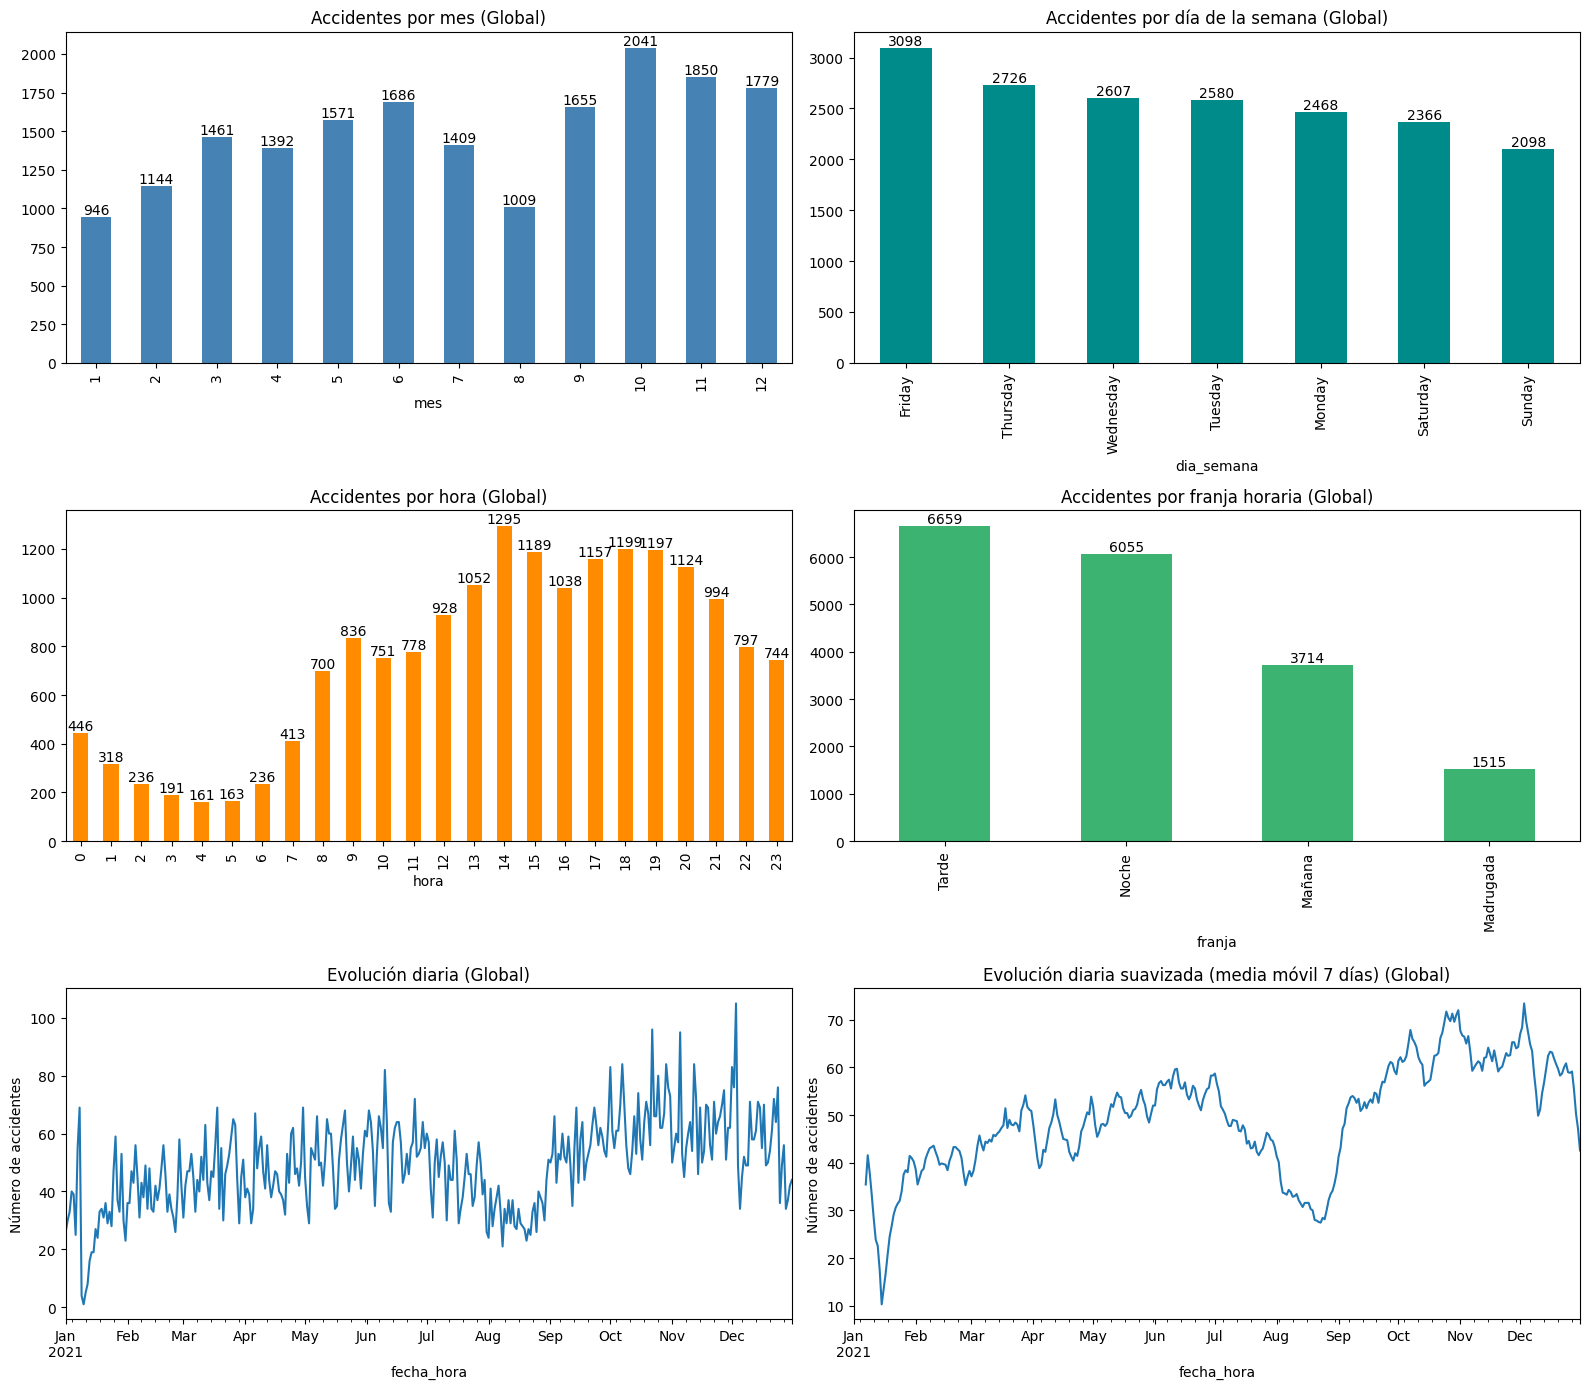

In [46]:
plot_temporal_univariate(df_21_unicos)

In [86]:
def plot_temporal_univariate_2(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    fig = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = df['mes'].value_counts().sort_index()
    freq_mes.plot(kind='bar', ax=ax_mes, color="steelblue",
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_ylabel("Número de accidentes")
    ax_mes.bar_label(ax_mes.containers[0])
    total=len(df)
    ax_mes.text(
    0.3, 0.95, f'Total: {total} accidentes', 
    transform=ax_mes.transAxes, 
    ha='right', va='top', fontsize=12)


    # 2. Accidentes por día de la semana
    dias_es = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    map_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}
    df['dia_semana_es'] = df['dia_semana'].map(map_dias)

    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = df['dia_semana_es'].value_counts().reindex(dias_es)
    freq_semana.plot(kind='bar', ax=ax_semana, color="gold",
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_ylabel("Número de accidentes")
    ax_semana.bar_label(ax_semana.containers[0])

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = df['hora'].value_counts().sort_index()
    freq_hora.plot(kind='bar', ax=ax_hora, color="darkorange",
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_ylabel("Número de accidentes")
    ax_hora.bar_label(ax_hora.containers[0])

    # 4. Accidentes por franja horaria
    orden_franjas = ["Madrugada", "Mañana", "Tarde", "Noche"]

    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = df['franja'].value_counts().reindex(orden_franjas, fill_value=0)
    freq_franja.plot(kind='bar', ax=ax_franja, color="mediumseagreen",
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_franja.set_ylabel("Número de accidentes")
    ax_franja.bar_label(ax_franja.containers[0])

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="darkred"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=14)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 45, str(v), ha="center", fontsize=12)
    ax_curva.tick_params(axis="x", rotation=45)
    plt.ylim(750, 2250)


    plt.tight_layout()
    plt.show()

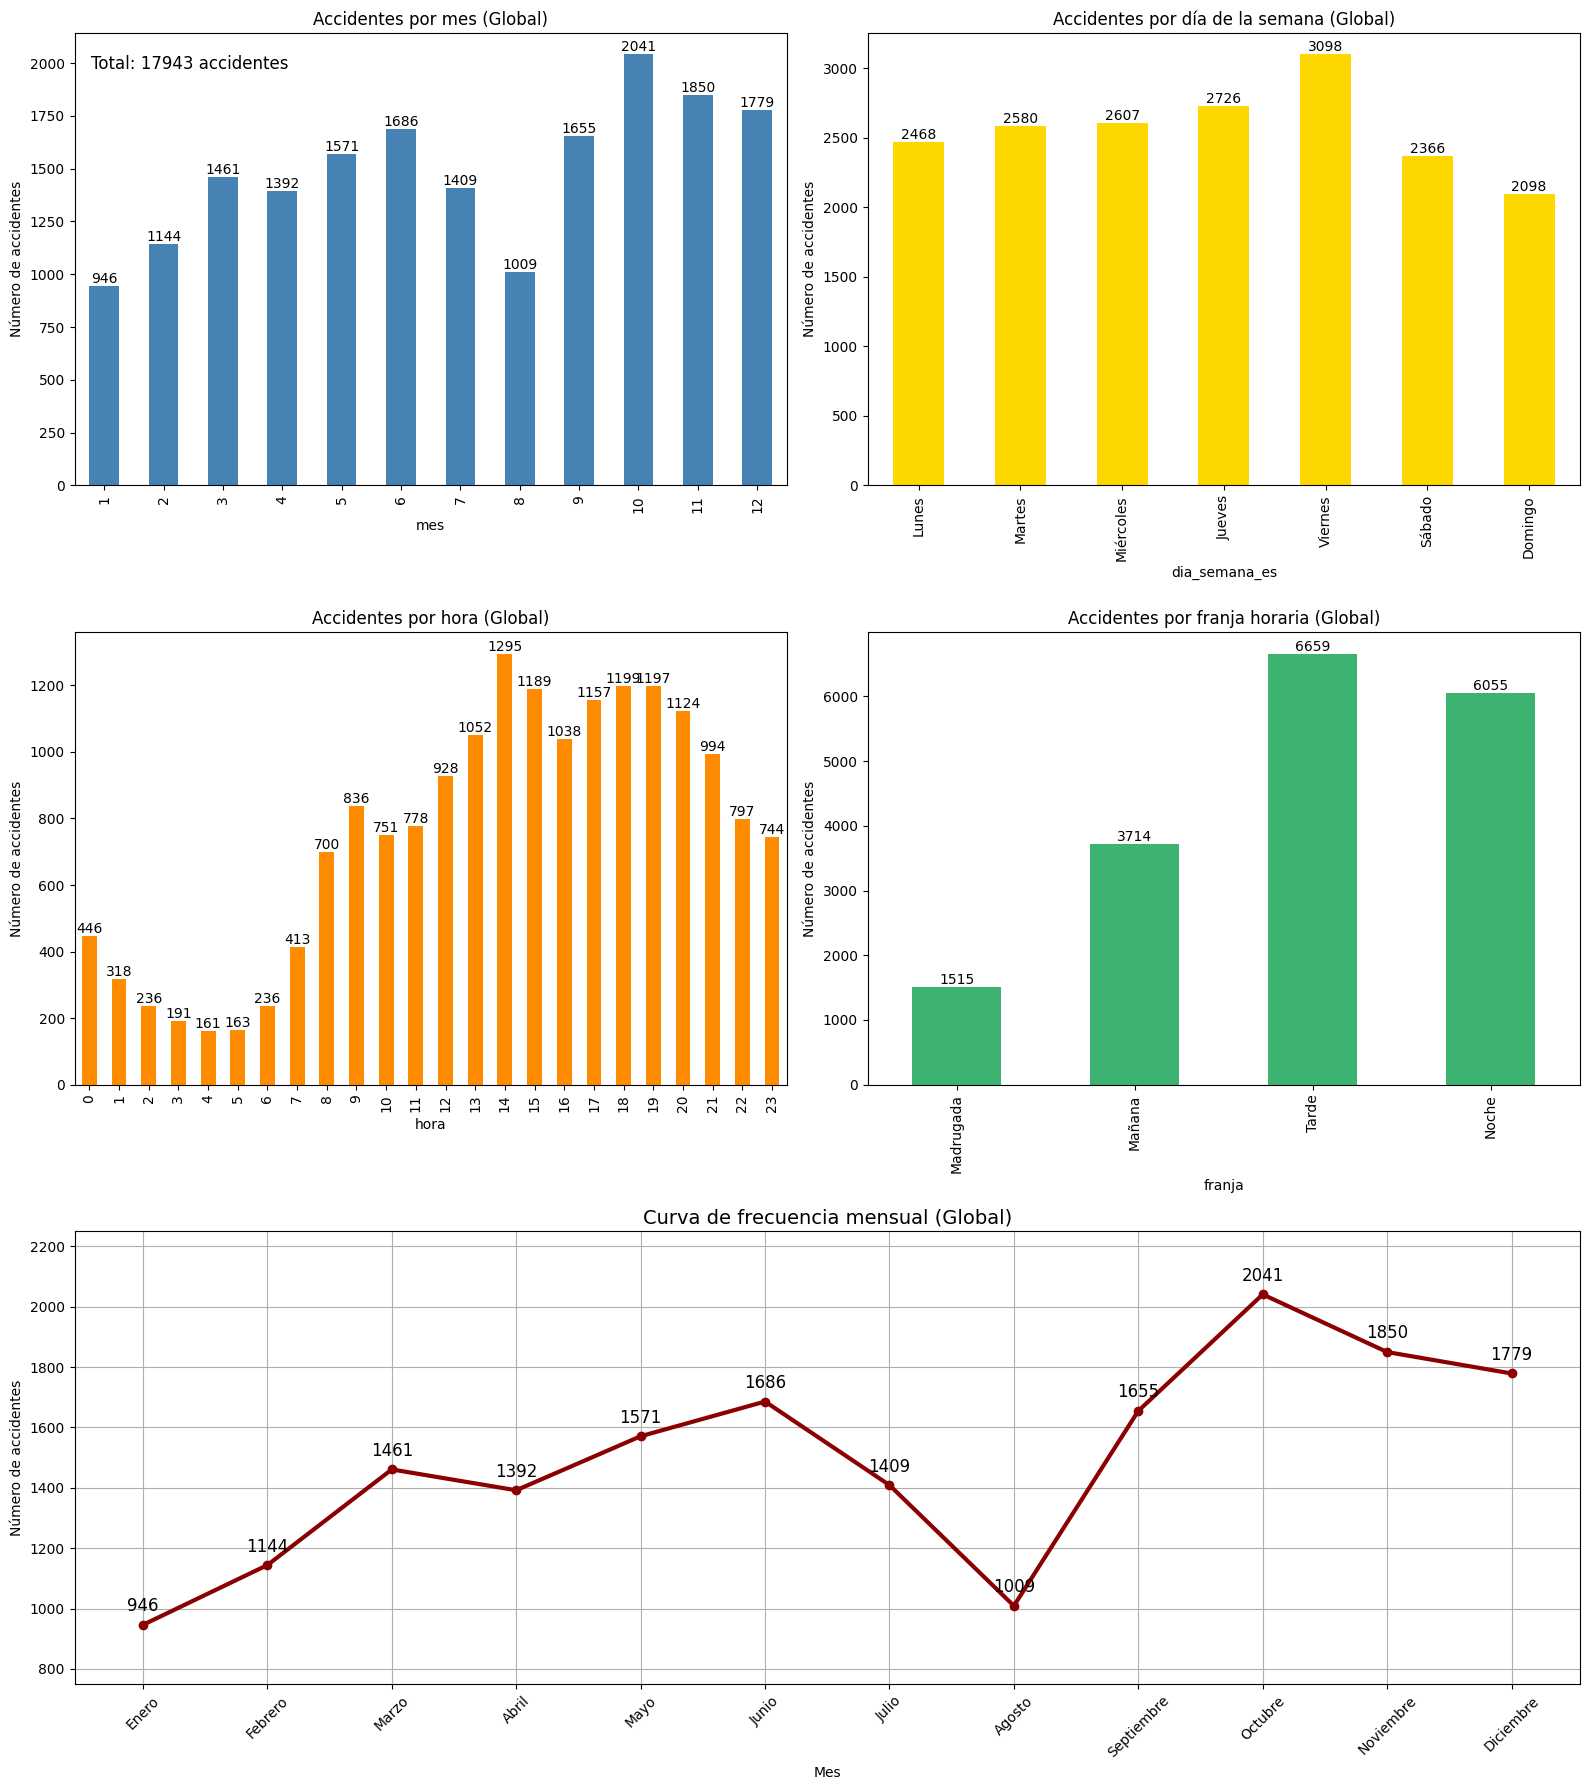

In [87]:
plot_temporal_univariate_2(df_21_unicos)

### Análisis geográfico

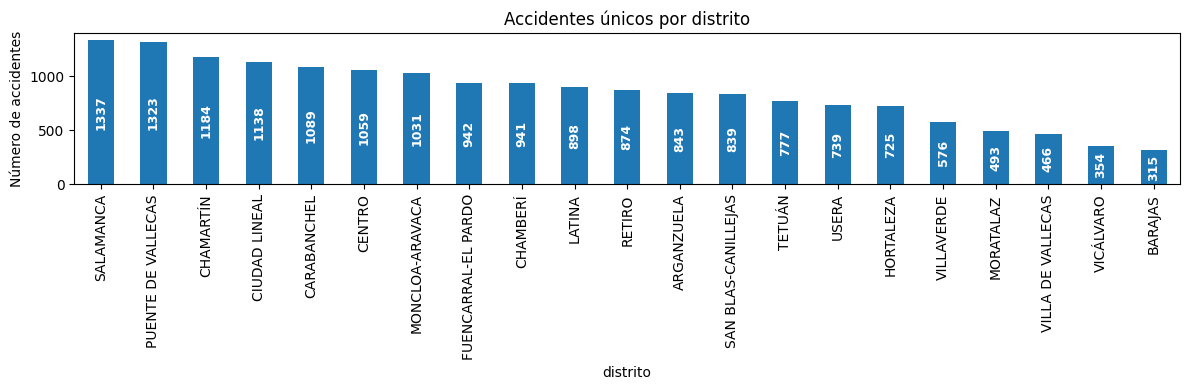

In [85]:

accidentes_distrito=df_21_unicos["distrito"].value_counts()
ax=accidentes_distrito.plot(
    kind="bar", figsize=(12,4))

plt.title("Accidentes únicos por distrito")
plt.ylabel("Número de accidentes")
plt.tight_layout()

for p, value in zip(ax.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()


### Análisis demográfico

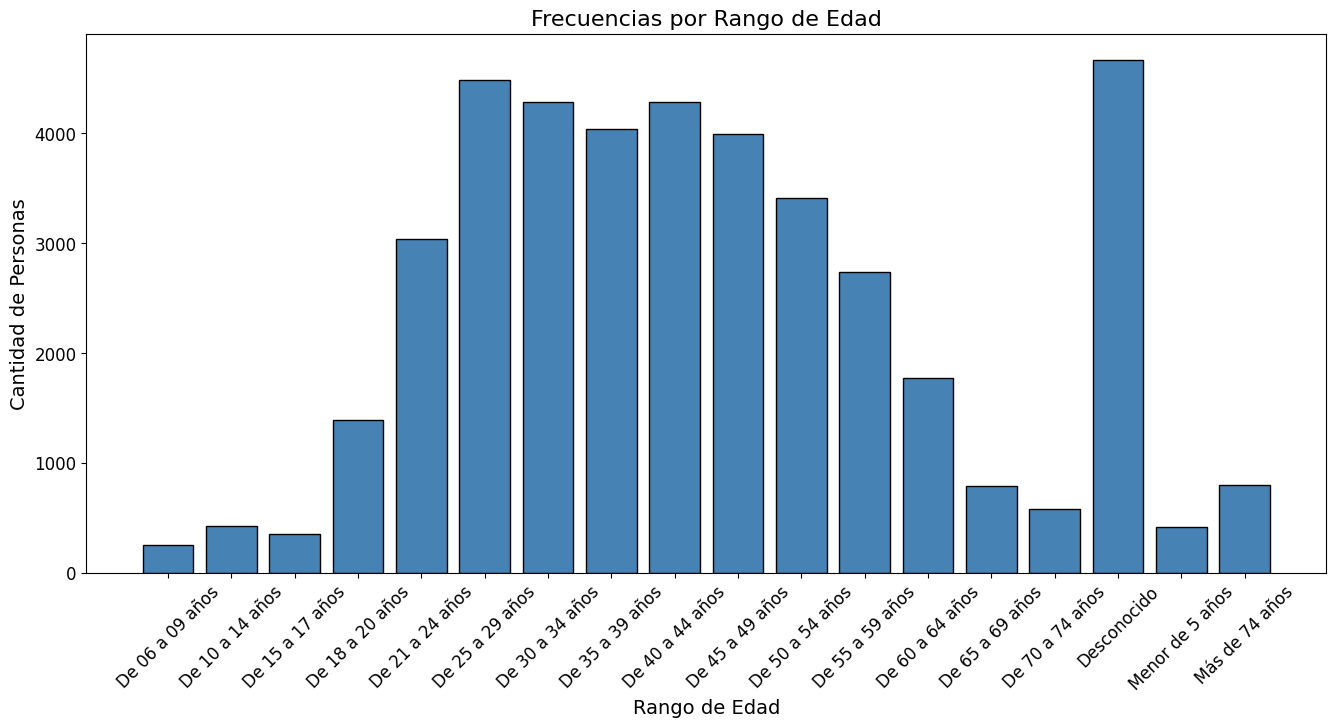

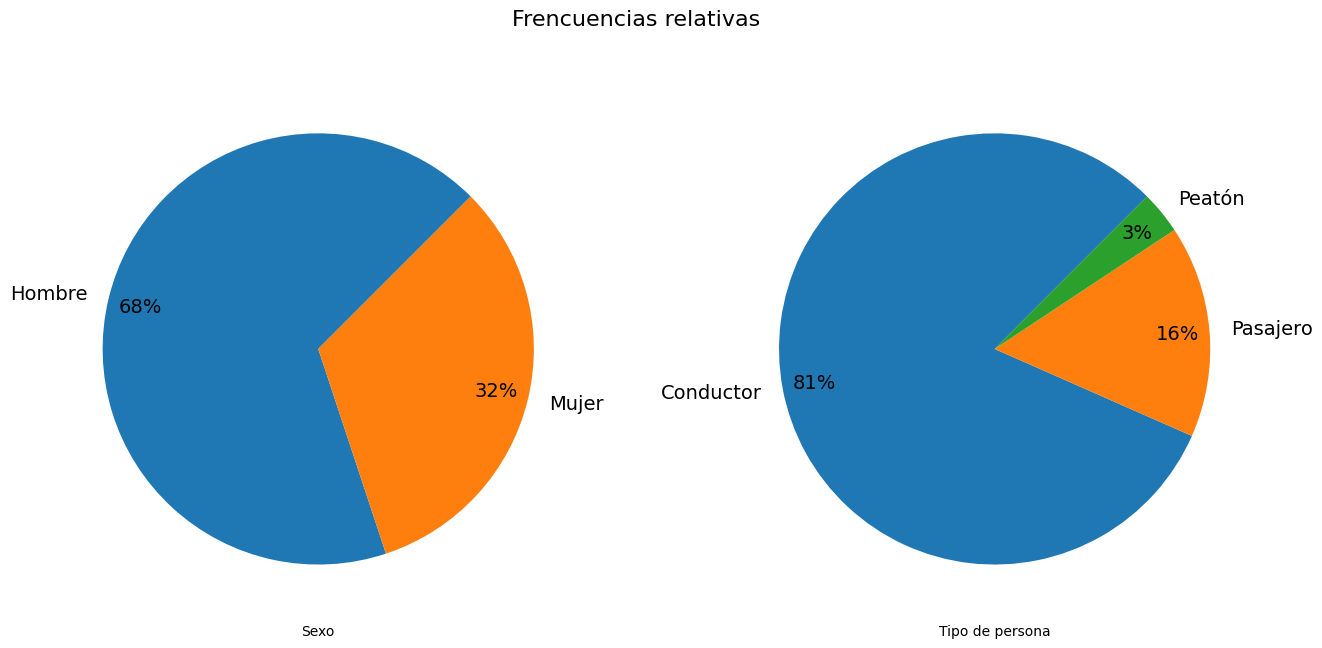

In [40]:
#Sintaxis de python
edades=df_21.rango_edad.value_counts().sort_index()
fig2=plt.figure(figsize=(16,7))
plt.bar(edades.index, edades, color="steelblue", edgecolor="black")
plt.title("Frecuencias por Rango de Edad", fontsize=16) 
plt.xlabel("Rango de Edad", fontsize=14)
plt.ylabel("Cantidad de Personas", fontsize=14)
plt.xticks(fontsize=12, rotation=45) # Rotación por si los nombres son largos
plt.yticks(fontsize=12);

fig3, axs=plt.subplots(1, 2, figsize=(16, 7))
pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 14}, # Aumenta tamaño de letra (porcentajes y etiquetas)
    'pctdistance': 0.85,           # Posición de los porcentajes (0=centro, 1=borde)
    'labeldistance': 1.1           # Posición de los nombres (1.1 está justo afuera)
}
fig3.suptitle("Frencuencias relativas", fontsize=16)
axs[0].set_xlabel("Sexo")
sexo_counts= df_21.sexo.value_counts(normalize=True).drop("Desconocido", errors='ignore')
axs[0].pie(sexo_counts, 
           labels=sexo_counts.index,**pie_kwargs)
axs[1].set_xlabel("Tipo de persona")
axs[1].pie(df_21.tipo_persona.value_counts(normalize=True)*100, 
           labels=df_21.tipo_persona.value_counts().index,**pie_kwargs);


In [ ]:
range(len(edades))

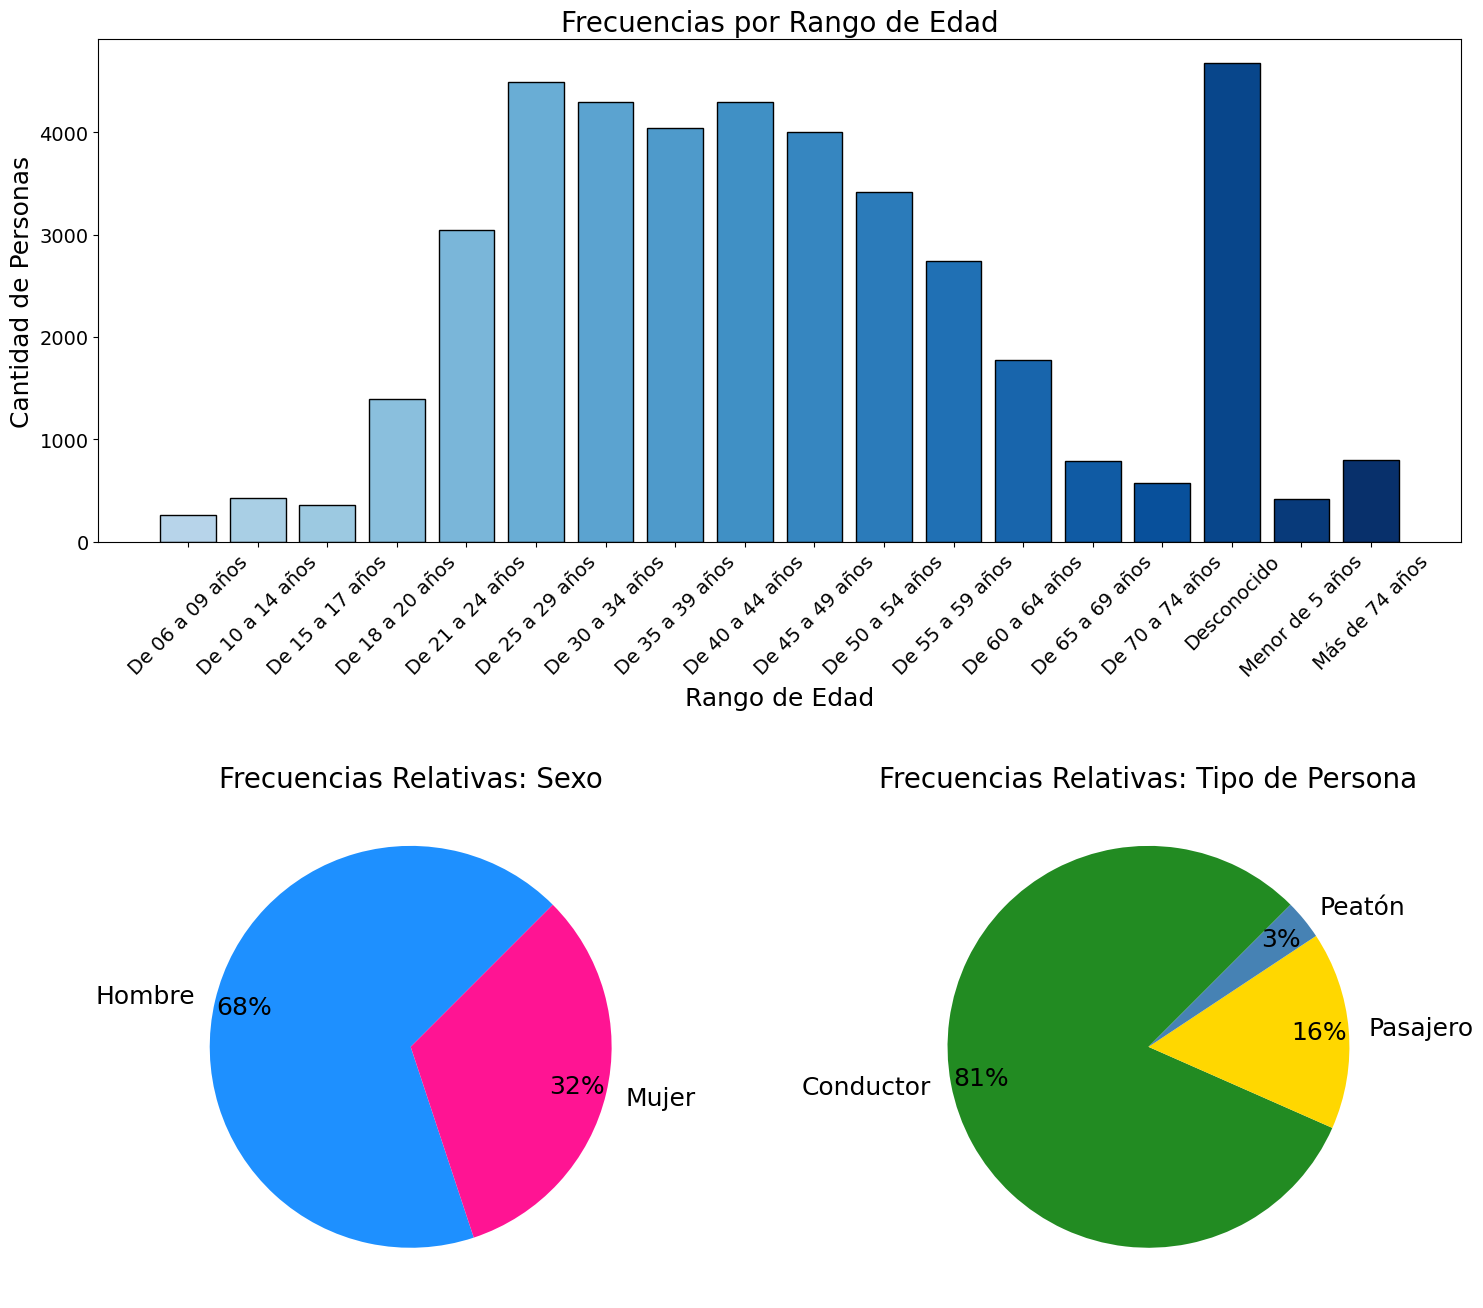

In [41]:
#ANÁLISIS DEMOGRÁFICO
#Figura de análisis demográfico

edad_counts = df_21.rango_edad.value_counts().drop("Desconocido", errors="ignore").sort_index()
sexo_counts = df_21.sexo.value_counts(normalize=True).drop("Desconocido", errors='ignore')
tipo_counts = df_21.tipo_persona.value_counts(normalize=True)


fig_2 = plt.figure(figsize=(16, 14))


ax1 = plt.subplot(2, 1, 1) #ocupa todo el ancho
colores=plt.cm.Blues(np.linspace(0.3,1,len(edades)))
ax1.bar(edades.index, edades, color=colores, edgecolor="black")
ax1.set_title("Frecuencias por Rango de Edad", fontsize=20) 
ax1.set_xlabel("Rango de Edad", fontsize=18)
ax1.set_ylabel("Cantidad de Personas", fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 18},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

ax2 = plt.subplot(2, 2, 3) # Fila 1, Columna 1
ax2.pie(sexo_counts, labels=sexo_counts.index, colors=["dodgerblue", "deeppink"], **pie_kwargs)
ax2.set_title("Frecuencias Relativas: Sexo", fontsize=20)

ax3 = plt.subplot(2, 2, 4) # Fila 1, Columna 2
ax3.pie(tipo_counts, labels=tipo_counts.index, colors=["forestgreen", "gold", "steelblue"], **pie_kwargs)
ax3.set_title("Frecuencias Relativas: Tipo de Persona", fontsize=20)


plt.tight_layout(pad=4.0) #para que no se solapen
# plt.show()

### Análisis de gravedad y contexto

In [ ]:
df_21.tipo_vehiculo.value_counts()

In [ ]:
len(df_21.tipo_accidente.value_counts())

In [ ]:
import squarify

In [ ]:
# ANÁLISIS POR FACTORES ASOCIADOS AL ACCIDENTE
# Variables: lesividad, tipo_accidente, tipo_vehiculo, estado_meteorológico, positiva_alcohol
# Bar Chart: Para tipo_accidente y tipo_vehiculo. 
# Treemap: Si tienes muchas categorías en tipo_vehiculo,un Treemap ayuda a ver visualmente cuáles predominan. 
# Waffle Chart: Muy visual para positiva_alcohol (ej. cuántos de cada 100 dieron positivo).


fig_4 = plt.figure(figsize=(12, 16))

plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

lesividad_counts=df_21.lesividad.value_counts()
alcohol_counts=df_21.positiva_alcohol.value_counts().drop("No consta", errors="ignore")
vehiculo_counts=df_21.tipo_vehiculo.value_counts().nlargest(5)
meteo_counts=df_21.estado_meteorológico.value_counts()
tipo_counts=df_21.tipo_accidente.value_counts()

ax1=plt.subplot(3,2,1)
ax1.set_title('Distribución por Lesividad', fontweight='bold')
ax1.bar(lesividad_counts.index, lesividad_counts, color="steelblue" )
ax1.set_xlabel('Grado de Lesividad', fontsize=14)
ax1.set_ylabel('Número de Accidentes', fontsize=14)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

ax2=plt.subplot(3,2,2)
ax2.set_title('Positiva Alcohol (Test)', fontweight='bold')
ax2.pie(alcohol_counts, labels=alcohol_counts.index, **pie_kwargs)

ax3=plt.subplot(3,2,3)
ax3.set_title('Top 5 Vehículos más Frecuentes (Treemap)', fontweight='bold')
squarify.plot(sizes=vehiculo_counts.values, label=vehiculo_counts.index, 
              alpha=0.8, ax=ax3, color=plt.cm.Pastel1.colors)

ax4=plt.subplot(3,2,4)
ax4.set_title('Estado Meteorológico', fontweight='bold')
bars4=ax4.barh(meteo_counts.index, meteo_counts)
ax4.set_xlabel('Frecuencia', fontsize=14)
ax4.set_ylabel('Condición', fontsize=14)
ax4.set_yticks([])
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(100, i, 
             meteo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   

ax5 = plt.subplot(3,1,3) 
bars5 = ax5.barh(tipo_counts.index, tipo_counts, color='mediumseagreen')
ax5.set_title('Tipos de Accidentes (Total 13 Categorías)', fontweight='bold')
ax5.set_xlabel('Frecuencia', fontsize=14)
ax5.set_ylabel('Tipo de Accidente', fontsize=14)
ax5.set_yticks([])
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(50, i, 
             tipo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   
plt.tight_layout(pad=4.0) # Para que no se solapen los títulos
